In [ ]:
library(lmtest)
library(sandwich)
library(readxl) 

In [13]:
health <- read_excel("health_small.xlsx") 

In [8]:
health_1997 <- subset(health, YEAR == 1997)
print(colnames(health_1997))

[1] "obs"         "COUNTRY"     "COUNTRYNAME" "DALE"        "GDPC"       
[6] "GINI"        "YEAR"       


1 a)

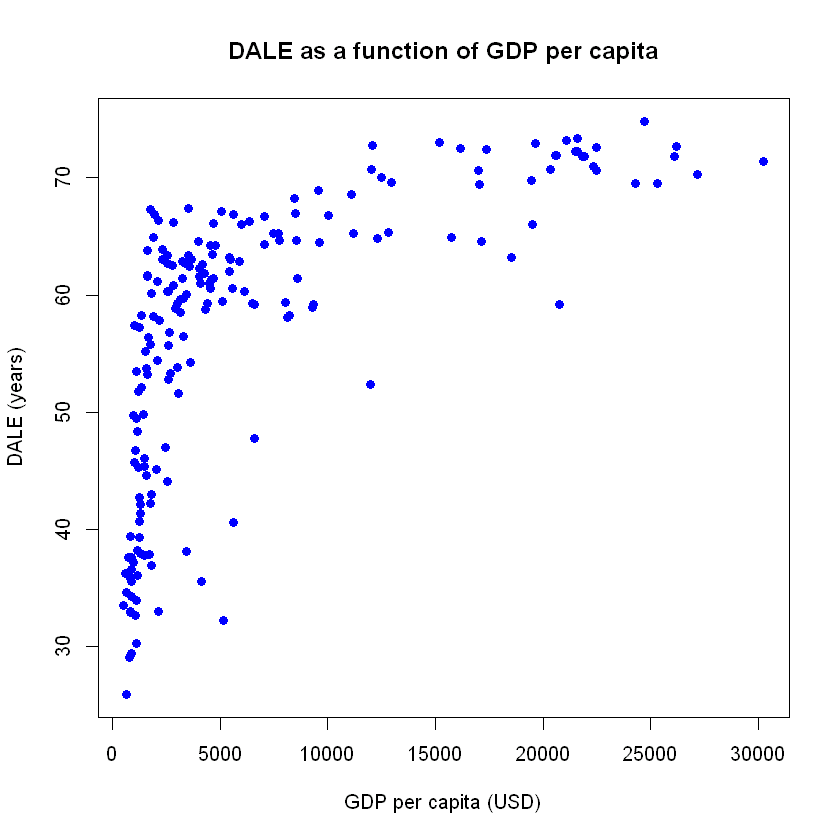

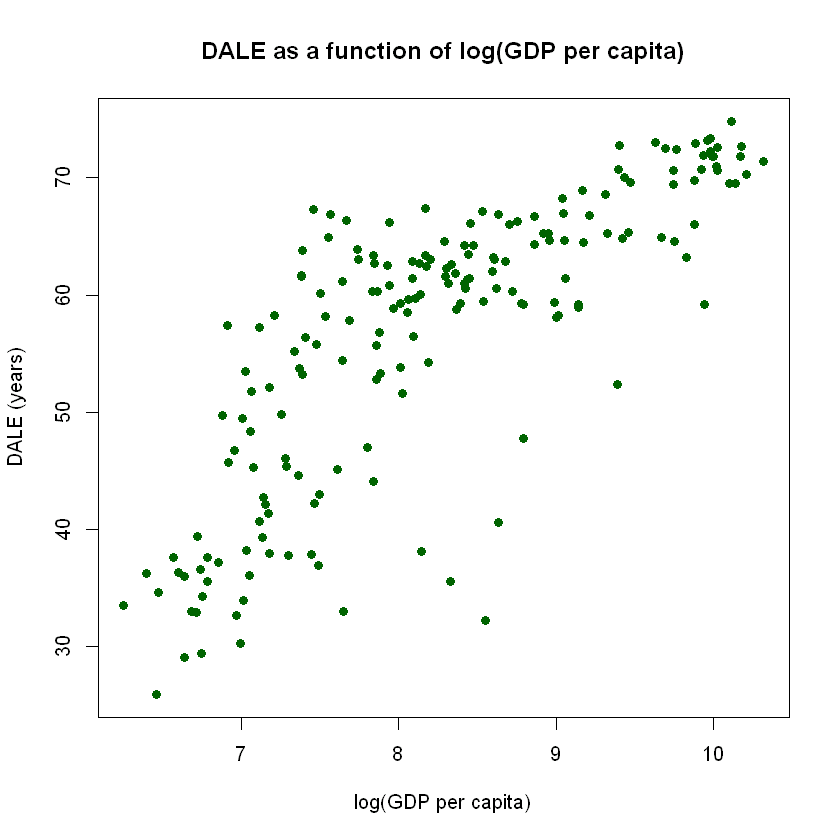

In [ ]:
plot(health_1997$GDPC, health_1997$DALE,
     xlab = "GDP per capita (USD)",
     ylab = "DALE (years)",
     main = "DALE as a function of GDP per capita",
     pch = 19, col = "blue")

plot(log(health_1997$GDPC), health_1997$DALE,
     xlab = "log(GDP per capita)",
     ylab = "DALE (years)",
     main = "DALE as a function of log(GDP per capita)",
     pch = 19, col = "darkgreen")


In [10]:
health_1997$logGDPC <- log(health_1997$GDPC)
model1 <- lm(DALE ~ logGDPC, data = health_1997)
summary(model1)



Call:
lm(formula = DALE ~ logGDPC, data = health_1997)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.302  -4.635   0.876   4.883  17.730 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.8714     4.2891   -4.40 1.81e-05 ***
logGDPC       9.1774     0.5158   17.79  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.537 on 189 degrees of freedom
Multiple R-squared:  0.6262,	Adjusted R-squared:  0.6242 
F-statistic: 316.6 on 1 and 189 DF,  p-value: < 2.2e-16


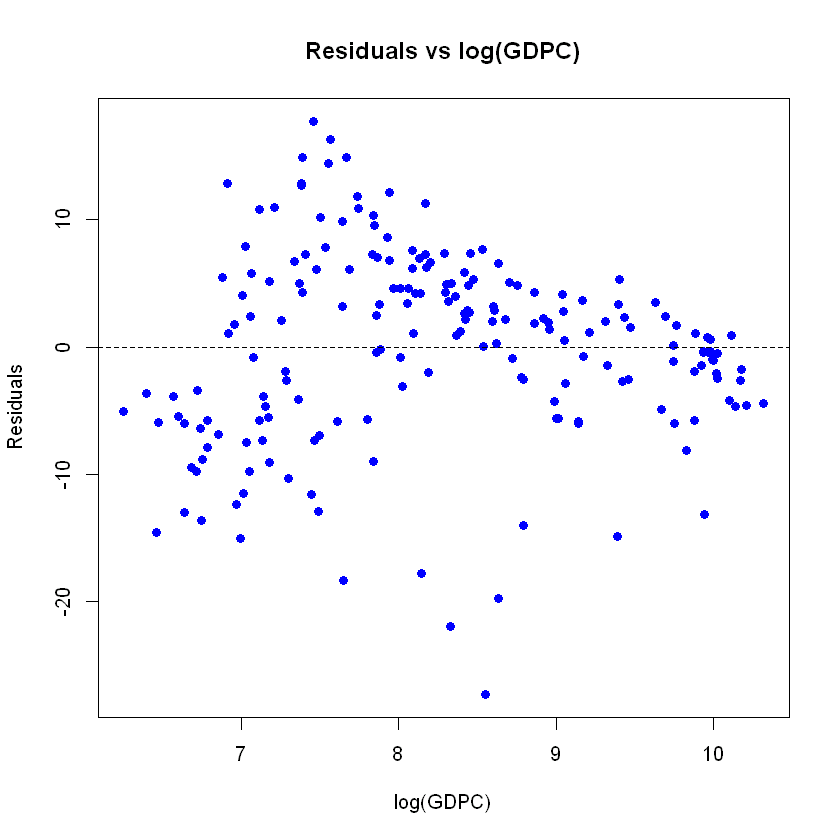

In [11]:
residuals1 <- resid(model1)
plot(health_1997$logGDPC, residuals1,
     xlab = "log(GDPC)", ylab = "Residuals",
     main = "Residuals vs log(GDPC)", pch = 19, col = "blue")
abline(h = 0, lty = 2)

Az ábrán általában azt látni, hogy a reziduumok szóródása nem teljesen állandó: alacsony log(GDPC) értékeknél nagyobb a variancia, míg magasabbaknál szűkebb. Ez heteroszkedaszticitásra utal.

In [14]:
coeftest(model1) 
coeftest(model1, vcov = vcovHC(model1, type = "HC1"))


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -18.87144    4.28914 -4.3998 1.808e-05 ***
logGDPC       9.17742    0.51578 17.7933 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -18.87144    3.97950 -4.7422 4.155e-06 ***
logGDPC       9.17742    0.44932 20.4251 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The coefficient of log(GDPC) is statistically significant both under homoscedasticity and heteroscedasticity. An increase of one unit in the logarithm of GDPC raises life expectancy (DALE) by about 9 years. This means that in order to increase life expectancy by 1 year, GDP per capita needs to grow by approximately 12 percent.

In [15]:
residuals1 <- resid(model1)
cor(residuals1, health_1997$logGDPC, use = "complete.obs")

[1] 1.012283e-16

In [21]:
confint(model1, vcov. = vcovHC(model1, type = "HC1"), level = 0.95)


,2.5 %,97.5 %
(Intercept),-27.332174,-10.41070
logGDPC,8.159995,10.19485


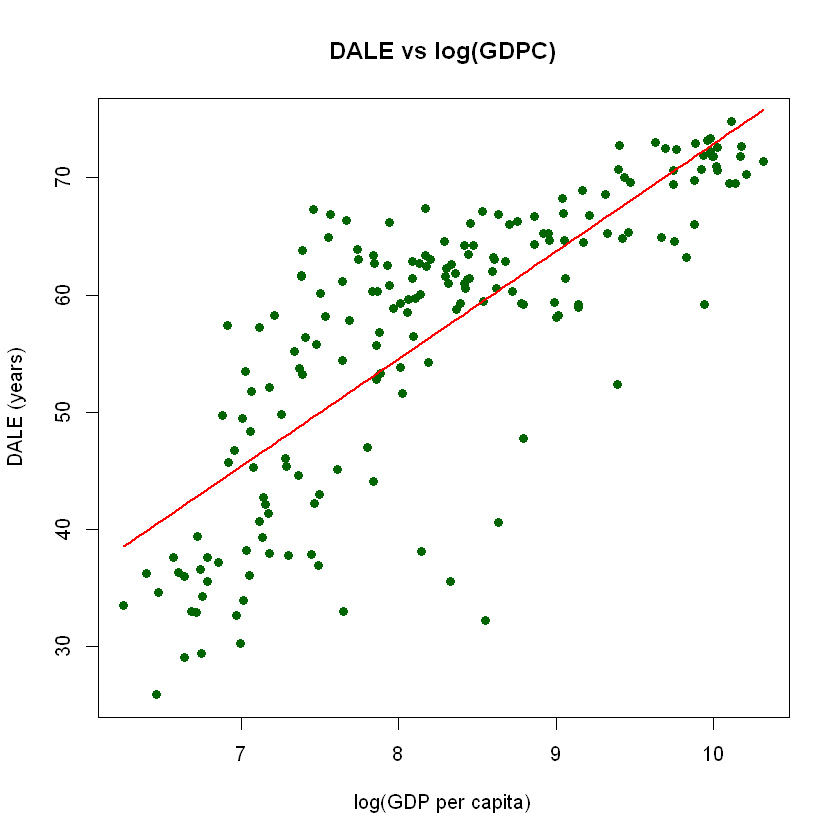

In [22]:
plot(log(health_1997$GDPC), health_1997$DALE,
     xlab = "log(GDP per capita)",
     ylab = "DALE (years)",
     main = "DALE vs log(GDPC)",
     pch = 19, col = "darkgreen")
curve(coef(model1)[1] + coef(model1)[2]*x,
      add = TRUE, col = "red", lwd = 2)


## 2

In [23]:
model2 <- lm(DALE ~ GDPC + I(GDPC^2), data = health_1997)
summary(model2)



Call:
lm(formula = DALE ~ GDPC + I(GDPC^2), data = health_1997)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.851  -5.902   1.064   6.125  17.974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.410e+01  1.160e+00  38.008  < 2e-16 ***
GDPC         3.165e-03  3.201e-04   9.889  < 2e-16 ***
I(GDPC^2)   -8.651e-08  1.300e-08  -6.655 3.01e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.465 on 188 degrees of freedom
Multiple R-squared:  0.531,	Adjusted R-squared:  0.526 
F-statistic: 106.4 on 2 and 188 DF,  p-value: < 2.2e-16


In [24]:
b1 <- coef(model2)["GDPC"]
b2 <- coef(model2)["I(GDPC^2)"]
gdpc_val <- 14000
marginal_effect <- b1 + 2 * b2 * gdpc_val
marginal_effect

GDPC 
0.0007426926

A quadratic model can be written as:

$DALE = \alpha + \beta_1 \cdot GDPC + \beta_2 \cdot GDPC^2 + u$

The marginal effect of $GDPC$ on $DALE$ is obtained by differentiation:

$\frac{\partial DALE}{\partial GDPC} = \beta_1 + 2\beta_2 \cdot GDPC$


In [25]:
b_log <- coef(model1)["logGDPC"]
gdpc_val <- 14000
marginal_effect_log <- b_log / gdpc_val
marginal_effect_log


logGDPC 
0.0006555301

Az első modell:

$DALE = \alpha + \beta \cdot \log(GDPC) + u$

A marginális hatás a GDPC-re:

$\frac{\partial DALE}{\partial GDPC} = \frac{\beta}{GDPC}$




## 3

In [28]:
model3 <- lm(DALE ~ logGDPC + GINI, data = health_1997)
summary(model3)



Call:
lm(formula = DALE ~ logGDPC + GINI, data = health_1997)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.1700  -4.6510   0.1059   4.3754  15.9706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4685     5.6294   0.083    0.934    
logGDPC       8.3317     0.5158  16.154  < 2e-16 ***
GINI        -32.2825     6.5338  -4.941 1.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.11 on 188 degrees of freedom
Multiple R-squared:  0.6691,	Adjusted R-squared:  0.6656 
F-statistic: 190.1 on 2 and 188 DF,  p-value: < 2.2e-16


This means that if the Gini index increases by 1 unit (for example, from 0.35 to 0.36), DALE (disability-adjusted life expectancy) decreases by about 32 years on average, holding the logarithm of GDP per capita constant.

Since the Gini index in reality ranges between 0 and 1, a full unit change is not realistic. It is more meaningful to interpret that a 0.1 (10 percentage point) increase in the Gini index corresponds to about a 3.2-year reduction in DALE.

The results show a strong negative association between GINI and DALE, but this cannot be interpreted as a causal effect. Higher inequality may correlate with other omitted factors (e.g., institutions, health systems, education) that also affect life expectancy, and reverse causality is possible as well. Therefore, we can only conclude correlation, not causation.

In part 1, the coefficient of log(GDPC) was larger because the model did not control for inequality. In part 3, after including GINI, the coefficient of log(GDPC) decreased. This indicates that some of the variation in DALE previously attributed to income per capita is actually explained by differences in income inequality, so the part 1 estimate was upward biased due to omitted variable bias.

In [29]:
coef_part1 <- coef(model1)["logGDPC"]
coef_part3 <- coef(model3)["logGDPC"]
coef_gini <- coef(model3)["GINI"]
delta <- coef(lm(GINI ~ logGDPC, data = health_1997))["logGDPC"]

lhs <- coef_part1
rhs <- coef_part3 + coef_gini * delta

lhs
rhs


logGDPC 
9.177421

logGDPC 
9.177421

The omitted variable bias formula in this case is:

$\hat{\beta}_{\text{logGDPC}}^{(1)} = \hat{\beta}_{\text{logGDPC}}^{(3)} + \hat{\beta}_{\text{GINI}} \cdot \delta$

where $\delta$ is the slope from the regression $GINI \sim \log(GDPC)$.
